In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
#plt.style.use('')


from sklearn import metrics
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder

In [2]:
data = pd.read_csv("data/train.csv")

In [3]:
y = data.pop('Exited')

In [4]:
interesting_columns = ['CreditScore', 'Geography', 'Gender',
        'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data[interesting_columns], y, test_size=0.25, random_state=894)

In [6]:
y_train.mean(), y_test.mean()

(0.21210260553423552, 0.21008749606146537)

In [7]:
categorical_columns = ['Geography', 'Gender', 'NumOfProducts'] # ignore  ['HasCrCard', 'IsActiveMember'] --> passthrough :)
X_train[categorical_columns]

,Geography,Gender,NumOfProducts
154520,France,Male,1
9159,France,Female,2
143955,France,Female,1
57966,Spain,Male,1
160713,France,Male,2
...,...,...,...
121640,France,Male,2
94035,France,Female,1
78052,Germany,Female,1
5403,France,Male,2


In [8]:
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
X_train[numerical_columns]

,CreditScore,Age,Tenure,Balance,EstimatedSalary
154520,696,41.0,2,156067.05,8983.88
9159,602,52.0,1,0.00,65413.38
143955,550,40.0,8,150490.32,166468.21
57966,714,41.0,7,0.00,123699.71
160713,556,71.0,9,0.00,152876.05
...,...,...,...,...,...
121640,698,25.0,7,0.00,88965.46
94035,758,41.0,9,0.00,199256.98
78052,521,35.0,9,123943.18,159553.27
5403,663,34.0,3,0.00,152167.79


In [9]:
preprocessor = ColumnTransformer(
                transformers=[("categorical", OneHotEncoder(drop='if_binary'), categorical_columns), 
                                ("numerical", RobustScaler(), numerical_columns)],
                remainder="passthrough", verbose_feature_names_out=True
            )

In [10]:
X_train_features = preprocessor.fit_transform(X_train)

In [11]:
X_train_features = pd.DataFrame(X_train_features, columns=preprocessor.get_feature_names_out())

In [12]:
X_train_features

,categorical__Geography_France,categorical__Geography_Germany,categorical__Geography_Spain,categorical__Gender_Male,categorical__NumOfProducts_1,categorical__NumOfProducts_2,categorical__NumOfProducts_3,categorical__NumOfProducts_4,numerical__CreditScore,numerical__Age,numerical__Tenure,numerical__Balance,numerical__EstimatedSalary,remainder__HasCrCard,remainder__IsActiveMember
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.327434,0.4,-0.75,1.302542,-1.348342,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.504425,1.5,-1.00,0.000000,-0.653079,1.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.964602,0.3,0.75,1.255998,0.592009,0.0,1.0
3,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.486726,0.4,0.50,0.000000,0.065062,1.0,1.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.911504,3.4,1.00,0.000000,0.424541,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123770,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.345133,-1.2,0.50,0.000000,-0.362896,1.0,1.0
123771,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.876106,0.4,1.00,0.000000,0.995997,0.0,1.0
123772,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.221239,-0.2,1.00,1.034435,0.506811,1.0,1.0
123773,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.035398,-0.3,-0.50,0.000000,0.415815,1.0,1.0


In [13]:
X_test_features = preprocessor.transform(X_test)

In [14]:
X_test_features = pd.DataFrame(X_test_features, columns=preprocessor.get_feature_names_out())

In [15]:
X_test_features

,categorical__Geography_France,categorical__Geography_Germany,categorical__Geography_Spain,categorical__Gender_Male,categorical__NumOfProducts_1,categorical__NumOfProducts_2,categorical__NumOfProducts_3,categorical__NumOfProducts_4,numerical__CreditScore,numerical__Age,numerical__Tenure,numerical__Balance,numerical__EstimatedSalary,remainder__HasCrCard,remainder__IsActiveMember
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,-0.1,0.25,0.000000,0.438192,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.185841,0.6,-0.50,1.227167,0.306747,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.061947,1.2,0.50,0.000000,0.450361,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.876106,1.0,-1.00,0.797240,-0.555977,1.0,0.0
4,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,-0.557522,-0.7,1.25,0.000000,0.265539,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41254,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.247788,-0.5,0.50,0.000000,-0.364111,1.0,0.0
41255,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.619469,0.2,1.00,1.425971,0.642054,1.0,1.0
41256,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.035398,-1.5,-0.50,0.000000,-0.801347,0.0,1.0
41257,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.300885,0.9,-0.50,1.266172,0.767804,1.0,0.0


In [16]:
import lightgbm as lgb
import datetime
from sklearn.model_selection import GridSearchCV

In [17]:
param_grid = dict(n_estimators=[200], 
                  colsample_bytree=[0.8], 
                  subsample=[0.8] , 
                  subsample_freq=[1],
                  learning_rate = [0.1, 0.2],
                  max_depth = [2],
                  num_leaves = [2, 4],
                  reg_alpha = [0.1, 0.2],
                  reg_lambda = [0.1, 0.2])

In [39]:
base_classifier  = lgb.LGBMClassifier(n_estimators = 200, colsample_bytree=0.8, subsample=0.8, subsample_freq=1, learning_rate=0.1, max_depth=2, 
                                 n_jobs=-1, force_row_wise=True, verbosity=-1, is_imbalance=True)
base_classifier.fit(X_train_features, y_train)

LGBMClassifier(colsample_bytree=0.8, force_row_wise=True, is_imbalance=True,
               max_depth=2, n_estimators=200, n_jobs=-1, subsample=0.8,
               subsample_freq=1, verbosity=-1)

In [40]:
start= datetime.datetime.now()

grid_search = GridSearchCV(
        estimator=base_classifier,
        param_grid=param_grid,
        return_train_score=True,
        cv=2, 
        scoring='f1', 
        n_jobs=-1, 
        verbose=0
    ).fit(X_train_features, y_train)

end = datetime.datetime.now()

In [41]:
print("Duration: {}".format(end-start), end, start)

Duration: 0:22:05.784482 2024-01-12 09:31:31.969826 2024-01-12 09:09:26.185344


In [52]:
lgb_classifier = grid_search.best_estimator_
lgb_classifier

LGBMClassifier(colsample_bytree=0.8, force_row_wise=True, is_imbalance=True,
               learning_rate=0.2, max_depth=2, n_estimators=200, n_jobs=-1,
               num_leaves=4, reg_alpha=0.2, reg_lambda=0.1, subsample=0.8,
               subsample_freq=1, verbosity=-1)

In [53]:
grid_search.best_score_

0.6311220373935338

In [54]:
cv_results = pd.DataFrame(grid_search.cv_results_).sort_values(by = 'mean_test_score', ascending=False)
cv_results['mean_test_score']

14    0.631122
15    0.631068
12    0.630668
13    0.630592
5     0.626106
6     0.625861
4     0.625840
7     0.625421
8     0.622515
10    0.622080
11    0.621962
9     0.621956
2     0.610725
0     0.610471
1     0.610289
3     0.610289
Name: mean_test_score, dtype: float64

In [55]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_auc_score

from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report

In [56]:
estimator = cross_validate(estimator=lgb_classifier, X=X_train_features, y=y_train, cv=StratifiedKFold(5), scoring='roc_auc', return_estimator=True)
estimator

{'fit_time': array([1.00828385, 1.75860167, 0.86359692, 0.99107885, 0.71729898]),
 'score_time': array([0.03807712, 0.03707075, 0.03261328, 0.0407238 , 0.03779697]),
 'estimator': [LGBMClassifier(colsample_bytree=0.8, force_row_wise=True, is_imbalance=True,
                 learning_rate=0.2, max_depth=2, n_estimators=200, n_jobs=-1,
                 num_leaves=4, reg_alpha=0.2, reg_lambda=0.1, subsample=0.8,
                 subsample_freq=1, verbosity=-1),
  LGBMClassifier(colsample_bytree=0.8, force_row_wise=True, is_imbalance=True,
                 learning_rate=0.2, max_depth=2, n_estimators=200, n_jobs=-1,
                 num_leaves=4, reg_alpha=0.2, reg_lambda=0.1, subsample=0.8,
                 subsample_freq=1, verbosity=-1),
  LGBMClassifier(colsample_bytree=0.8, force_row_wise=True, is_imbalance=True,
                 learning_rate=0.2, max_depth=2, n_estimators=200, n_jobs=-1,
                 num_leaves=4, reg_alpha=0.2, reg_lambda=0.1, subsample=0.8,
                 su

Text(0.5, 1.0, 'AUC Scores Across CV')

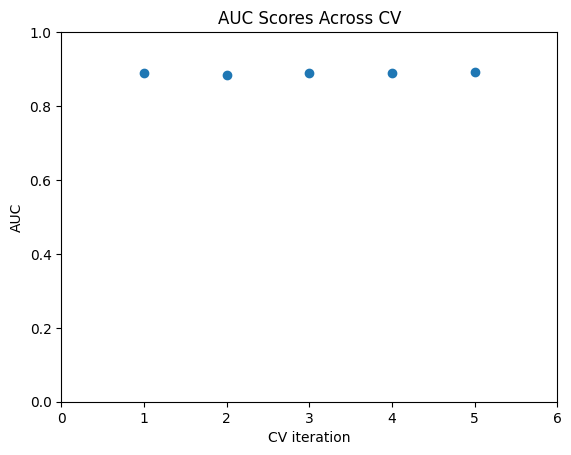

In [57]:
plt.scatter(range(1, 6), estimator['test_score'])
plt.xlim(0, 6)
plt.ylim(0, 1)
plt.ylabel("AUC")
plt.xlabel("CV iteration")
plt.title("AUC Scores Across CV")

In [58]:
y_test_pred = lgb_classifier.predict(X_test_features)
y_test_proba = lgb_classifier.predict_proba(X_test_features)

In [59]:
#Generate predicted probabilites
print('AUC: ', roc_auc_score(y_test, y_test_proba[:,1]))
print('Accuracy: ', lgb_classifier.score(X_test_features, y_test))

AUC:  0.8851901534529769
Accuracy:  0.8645628832497152


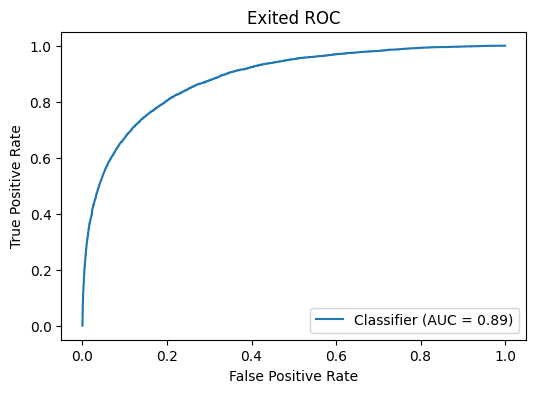

In [60]:
fig, ax = plt.subplots(figsize=(6, 4))
display = RocCurveDisplay.from_predictions(y_test, y_test_proba[:, 1], ax=ax) 

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Exited ROC")
plt.legend()
plt.show()

In [61]:
cr = classification_report(y_true=y_test, y_pred=y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     32591
           1       0.75      0.54      0.62      8668

    accuracy                           0.86     41259
   macro avg       0.82      0.74      0.77     41259
weighted avg       0.86      0.86      0.86     41259



## Save Model and Pipeline

In [70]:
import joblib

with open("models/lgb_classifier.joblib", "wb+") as openfile:
    joblib.dump(lgb_classifier, openfile)

In [71]:
with open("models/data_preprocessor.joblib", "wb+") as openfile:
    joblib.dump(preprocessor, openfile)

# Predictions


In [62]:
test_data = pd.read_csv("data/test.csv")

In [63]:
test_features = preprocessor.transform(test_data)

In [64]:
y_pred = lgb_classifier.predict(test_features)

In [65]:
y_pred_mat = lgb_classifier.predict_proba(test_features)
y_pred = y_pred_mat[:, 1]

In [66]:
submission = test_data[['id']]
submission['Exited'] = y_pred

/tmp/ipykernel_5559/2661433024.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['Exited'] = y_pred


In [67]:
submission

,id,Exited
0,165034,0.023778
1,165035,0.814724
2,165036,0.029936
3,165037,0.227407
4,165038,0.324201
...,...,...
110018,275052,0.037765
110019,275053,0.150655
110020,275054,0.016634
110021,275055,0.150914


In [68]:
submission.to_csv('data/predictions_submission.csv', index=False)